In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [11]:
np.random.rand(N * 2, 2) * 2 - 1

array([[-0.35658801,  0.96667182],
       [ 0.57817963, -0.33148248],
       [-0.6849629 ,  0.14671461],
       ...,
       [-0.03590216,  0.86642428],
       [ 0.95997182,  0.64375653],
       [-0.61283356,  0.36657277]])

## 指数分布

In [32]:
Lambda = 0.1
N = 100000
u = np.random.rand(N)
y = - Lambda * np.log(1 - u)

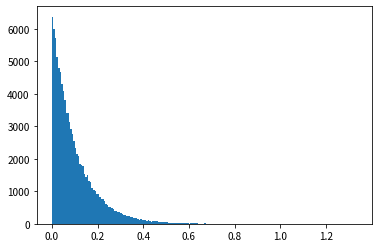

In [33]:
plt.hist(y, bins=200)
plt.show()

## 正規分布

In [28]:
N = 100000
z = np.random.rand(N * 2, 2) * 2 - 1
z = z[z[:, 0] ** 2 + z[:, 1] ** 2 < 1]
z = z[:N]

In [29]:
r = z[:, 0] ** 2 + z[:, 1] ** 2
y = z[:, 0] / (r ** 0.5) * ((-2 * np.log(r)) ** 0.5)

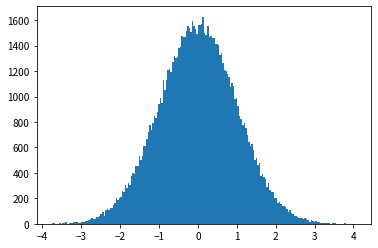

In [31]:
plt.hist(y, bins=200)
plt.show()

## ガンマ分布

In [114]:
a = 2.5
c = a - 1

### コーシー分布

In [115]:
cauchy_F = lambda x: np.tan(x * (np.pi / 2 + np.arctan(c)) - np.arctan(c)) + c

In [166]:
N = 100000
u = np.random.rand(N)
y = cauchy_F(u)

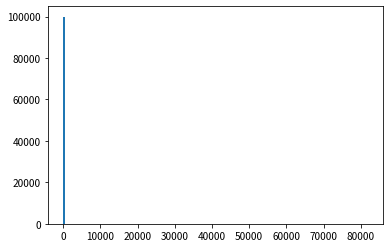

In [167]:
plt.hist(y, bins=200)
plt.show()

In [168]:
np.max(y)

81738.49681500442

In [169]:
np.mean(y)

5.7541524828394675

### ガンマ分布の生成

In [124]:
gamma_p_tilda = lambda x: (x ** (a - 1)) * np.exp(-x)
cauchy_p = lambda x: 1 / (1 + ((x - c) ** 2)) / (np.pi / 2 + np.arctan(c))

In [125]:
z = np.arange(0, 100, 0.01)
gammas = gamma_p_tilda(z)
cauchys = cauchy_p(z)

k = np.max(gammas / cauchys)
cauchys *= k

In [164]:
k

2.732761944808582

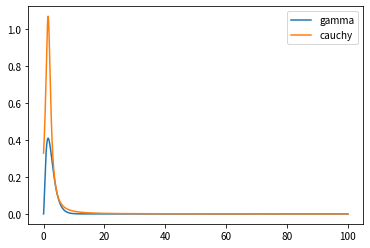

In [126]:
plt.plot(z, gammas, label='gamma')
plt.plot(z, cauchys, label='cauchy')

plt.legend()

plt.show()

In [160]:
N = 100000
u = np.random.rand(N * 3)
y = cauchy_F(u)

In [161]:
u0 = np.random.rand(N * 3)
u0 *= k * cauchy_p(y)

In [162]:
y = y[u0 < gamma_p_tilda(y)]
y = y[:N]

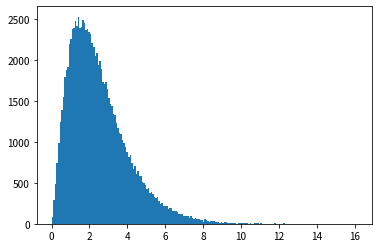

In [163]:
plt.hist(y, bins=200)

plt.show()